## SEQUENZA SEGMENT file 

In [59]:
import pandas as pd
import numpy as np
import os, glob

SEQUENZA_RESULT_DIR = "/data/project/Meningioma/11.cnv/2.sequenza/hg19"
TISSUE = "Tumor"
pattern = os.path.join(SEQUENZA_RESULT_DIR, "*" + TISSUE +"*_segments.txt")
segment_files = sorted(  glob.glob(pattern) )
segment_files = [i for i in segment_files  if i not in  [ '/data/project/Meningioma/11.cnv/2.sequenza/hg19/230323_Tumor_segments.txt',  '/data/project/Meningioma/11.cnv/2.sequenza/hg19/230405_Tumor_segments.txt' ] ]

df_CNApp = pd.DataFrame ( columns = ["ID", "chr", "loc.start", "loc.end", "seg.mean"])
df_gistic2 = pd.DataFrame ( columns = ["ID", "chr", "loc.start", "loc.end", "N.BAF", "depth.ratio"])

for segment_file in segment_files:
    Sample_ID = segment_file.split("/")[-1].split ("_segments.txt")[0]
    df_ind = pd.read_csv ( segment_file, sep = "\t" )

    for k in range ( df_ind.shape[0] ):
        if int (df_ind.iloc[k]["end.pos"])  - int (df_ind.iloc[k]["start.pos"]) >= 5000000:
            add_line = [ Sample_ID, df_ind.iloc[k]["chromosome"], df_ind.iloc[k]["start.pos"], df_ind.iloc[k]["end.pos"], np.log2(2 * df_ind.iloc[k]["depth.ratio"] ) - 1 ]
            add_line_gistic = [ Sample_ID, df_ind.iloc[k]["chromosome"].replace("chr", ""), df_ind.iloc[k]["start.pos"], df_ind.iloc[k]["end.pos"], df_ind.iloc[k]["N.BAF"], np.log2(2 * df_ind.iloc[k]["depth.ratio"] ) - 1 ]
            df_CNApp.loc [ len(df_CNApp.index) ] = add_line
            df_gistic2.loc [ len(df_gistic2.index) ] = add_line_gistic

In [60]:
OUTPUT_DIR="/data/project/Meningioma/11.cnv/2.sequenza/hg19/heatmap"

#01. CNApp
df_CNApp.to_csv ( OUTPUT_DIR + "/df_seg_total_CNApp.tsv", sep = "\t", header = True, index= False)

# 02. gistic
df_gistic2.to_csv ( OUTPUT_DIR + "/df_seg_total_gistic2.txt", sep = "\t", header = False, index= False)
# marker file:
os.system ( "cat "  + OUTPUT_DIR + "/df_seg_total_gistic2.txt | cut -f2,3 > " + OUTPUT_DIR + "/df_markers_total_gistic2.txt" )
os.system ( "cat " + OUTPUT_DIR + "/df_seg_total_gistic2.txt | cut -f2,4 >> " + OUTPUT_DIR + "/df_markers_total_gistic2.txt" )

# sort the files by chromosome, take the unique ones and number the markers.
#os.system ( "cat OUTPUT_DIR + "/df_markers_total_gistic2.txt | sort -V -k1,1 -k2,2nr | uniq | nl > OUTPUT_DIR + "/df_markers_unique_total_gistic2.txt")
os.system ( "cat  " + OUTPUT_DIR + "/df_markers_total_gistic2.txt | sort -V -k1,1 -k2,2 | uniq | nl > " + OUTPUT_DIR + "/df_markers_unique_total_gistic2.txt")
os.system ( "rm -rf " + OUTPUT_DIR + "/df_markers_total_gistic2.txt" )

0

In [61]:
df_CNApp [ df_CNApp["chr"] == "chr22"]

,ID,chr,loc.start,loc.end,seg.mean
166,190426_Tumor_FFT,chr22,26688401,42546018,-0.456213
167,190426_Tumor_FFT,chr22,42546019,50870620,-0.455786
223,190426_Tumor_PCT,chr22,17055458,51216127,-0.525846
282,190426_Tumor_PFT,chr22,17072483,51216127,-0.509282
342,190426_Tumor_PP,chr22,16123066,51216127,-0.419158
398,190426_Tumor_PT,chr22,17055458,51216127,-0.569945
455,220930_Tumor,chr22,16123379,51219006,-0.769562
523,221026_Tumor,chr22,18883680,25158597,0.094519
524,221026_Tumor,chr22,25246112,51193227,-0.565849
593,221102_Tumor,chr22,16122834,51219006,-0.387919


### CNApp 결과 다운받아서 그림그려주기

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcl
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

df_heatmap_CNApp = pd.read_csv ("/data/project/Meningioma/11.cnv/2.sequenza/hg19/heatmap/cna_profile_Arms_by_ID2024-04-22 08_45_12.tsv", sep = "\t", index_col = 0)
df_heatmap_CNApp = df_heatmap_CNApp.T
#df_heatmap_CNApp

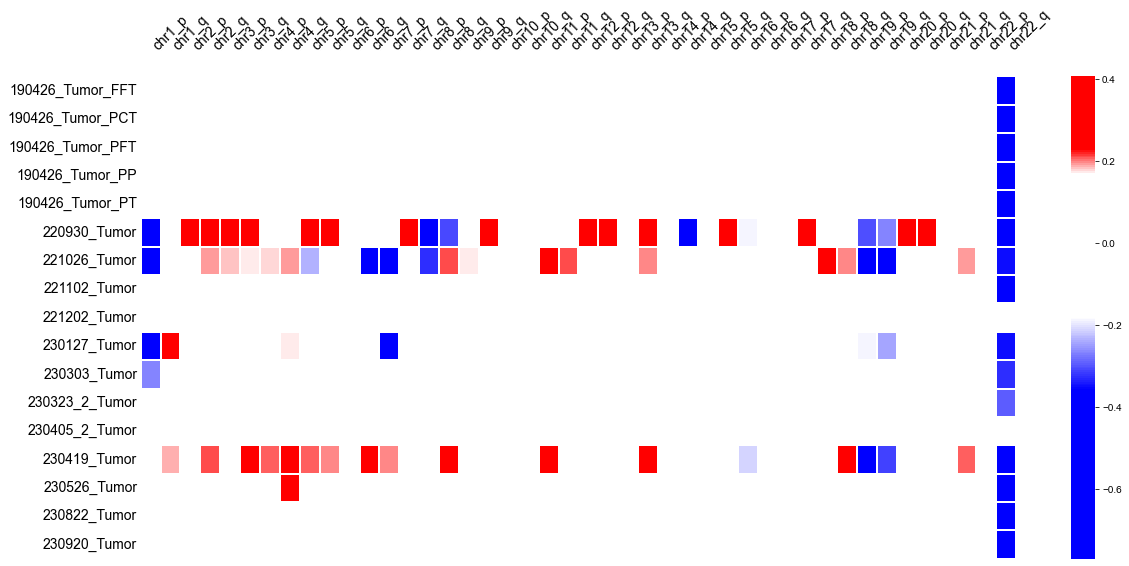

In [101]:
plt.rcParams["font.family"] = 'arial'

# vaf_df = vaf_df  * 100
# vaf_df = vaf_df.round(1)

DIVIDER = 0.5
fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize =(10 / DIVIDER, 5/ DIVIDER))

cmap = LinearSegmentedColormap.from_list('custom_cmap',   [ (0, "blue"), (0.35, "blue"), (0.5, "white"), (0.8, "white"), (0.85, "red"), (1, "red") ] )
#cmap = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'blue'), (0.5, 'white'), (1, 'red')] )

fig.subplots_adjust ( wspace = 0.4, bottom = 0.03, top = 0.7, left = 0.22, right = 0.98)
fig.set_facecolor('white')

sns.heatmap (df_heatmap_CNApp , cmap = cmap, linewidths = 0.1, linecolor = "white" )   # fmt=".2f", 
#fig.suptitle ( title, fontsize = 12, fontweight = "bold", ha = "left", x = 0 )
ax.set_xticklabels( ax.get_xticklabels(), fontsize = 7, ha = 'left' )
ax.tick_params(axis = 'x',  rotation = 45, pad = 20)
ax.set_yticklabels( [ i.get_text().replace( "" , "" ) for i in ax.get_yticklabels()], fontsize = 5, va = 'center' )
ax.tick_params(axis = 'y', pad = 0 )

plt.tick_params(axis='both', which='major', labelsize = 14, left = False, labelbottom = False, bottom=False, top = False, labeltop=True)

#fig.savefig ( Output_filename, dpi = 300)

---

## FACETCNV 결과로 동일하게 해보기

In [46]:
def parsing (line):
    CHR, POS, REF, ALT = line[0], int(line[1]), line[3], line[4]
    # 7. info
    info_list = line[7].split(';')
    info_dict = {}
    for i in range( len(info_list) ):
        if "=" in info_list[i]:
            info_dict [ info_list[i].split('=')[0] ] = info_list[i].split('=')[1]

    return CHR, POS, REF, ALT, info_list, info_dict



import pandas as pd
import numpy as np
import os, glob, gzip

FACETCNV_RESULT_DIR = "/data/project/Meningioma/11.cnv/5.facetcnv"
TISSUE = "Tumor"

for DATE in ["190426", "220930", "221026", "221102", "221202", "230127", "230303_2", "230405_2", "230419", "230526", "230822", "230920"]:
    Sample_ID = DATE + "_" + TISSUE
    FACETCNV_OUTPUT_PATH = FACETCNV_RESULT_DIR + "/" + DATE + "/" + TISSUE + "/" + DATE + ".vcf.gz"
    #segment_file = 

    input_file = gzip.open (FACETCNV_OUTPUT_PATH, "r")

    matrix = [] 
    colnames = ['CHR','START','END', 'MAJOR_CN', 'MINOR_CN', 'NORMAL_CN', 'TUMOR_PURITY' ]
    bed_df = pd.DataFrame (columns = colnames) 

    for line in input_file.readlines():
        if "gz" in FACETCNV_OUTPUT_PATH:
            line = line.decode('utf-8')
        line = line.rstrip('\n')
        
        
        if line[0] == "#": # Header 저장
            if line[0:8] == "##purity":
                TUMOR_PURITY = line.split("=")[1]
                if TUMOR_PURITY == "NA":
                    TUMOR_PURITY = 1.0
                else:
                    TUMOR_PURITY = round ( float(TUMOR_PURITY), 2 )
            elif line[0:8] == "##ploidy":
                TOTAL_PLOIDY = line.split("=")[1]
            continue
        
        else:
            line = line.split("\t")
            CHR, POS, REF, ALT , info_list, info_dict = parsing(line)
            START, END = POS, info_dict["END"]
            try:   #"LCN_EM에 . 같은 게 있어서 에러날 때가 있다"
                MAJOR_CN, MINOR_CN =  int(info_dict["TCN_EM"])  - int (info_dict["LCN_EM"]),  int (info_dict["LCN_EM"])
                NORMAL_CN = 2           
                if (MAJOR_CN == 0) & (MINOR_CN == 0): #230419_Tumor는 chr22에서 이상하게 TCN_EM=0;LCN_EM=0;로 나와서 pyclone-vi를 못 돌리게 한다
                    MAJOR_CN, MINOR_CNt = 1, 0
            except:
                continue
            output_line = [str(CHR), str(START), str(END), str(MAJOR_CN), str(MINOR_CN), str(NORMAL_CN),  str(TUMOR_PURITY) ]
            output_dict = {}
            for colname_index, colname in enumerate (colnames):
                output_dict[colname] = output_line[colname_index]
                
            bed_df = bed_df.append ( pd.Series( output_dict ), ignore_index = True )
            #bed_df = pd.concat ( [bed_df,  pd.Series( output_dict )], axis = 0)